In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
plt.style.use('ggplot')

In [4]:
# Import Co2 data as a dataframe with the 'datetime' column as its index
co2_file = 'older_co2-data.csv'
co2_data = pd.read_csv(co2_file, index_col='datetime', parse_dates=True)

In [5]:
print(co2_data.head())

                       location  co2
datetime                            
2017-03-25 09:02:00  Georgetown    2
2017-03-25 09:02:00  Georgetown  746
2017-03-25 09:02:00  Georgetown  741
2017-03-25 09:02:00  Georgetown  739
2017-03-25 09:02:00  Georgetown  739


In [5]:
print(co2_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63052 entries, 2017-03-25 09:02:00 to 2017-04-11 23:59:00
Data columns (total 3 columns):
date time    63052 non-null object
location     63052 non-null object
co2          63052 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.9+ MB
None


In [5]:
co2_data.describe()

,co2
count,63052.000000
mean,1104.347031
std,232.067364
min,2.000000
25%,971.000000
50%,1039.000000
75%,1274.000000
max,2001.000000


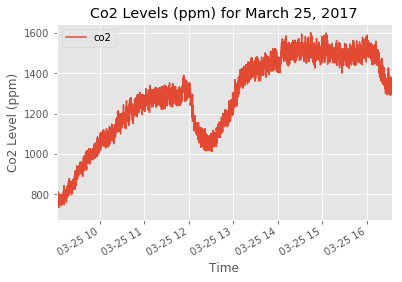

In [204]:
# Plot the Co2 data for March 25th
_ = co2_data.loc['March 25, 2017'].plot()
_ = plt.title('Co2 Levels (ppm) for March 25, 2017')
_ = plt.xlabel('Time')
_ = plt.ylabel('Co2 Level (ppm)')
plt.show()

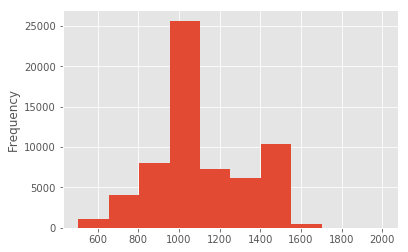

In [22]:
# Histogram of Co2 data
co2_data['co2'].plot(kind='hist', bins=10)
plt.show()

In [8]:
# Delete the 23 rows containing 2 values
co2_data = co2_data[co2_data['co2'] != 2]

In [9]:
# Updated Co2 summary statistics
# Can see that deleting the 2 values had negligible effect on mean and standard deviation and the new minimum is 505
co2_data.describe()

,co2
count,63029.00000
mean,1104.74929
std,231.15215
min,505.00000
25%,971.00000
50%,1039.00000
75%,1274.00000
max,2001.00000


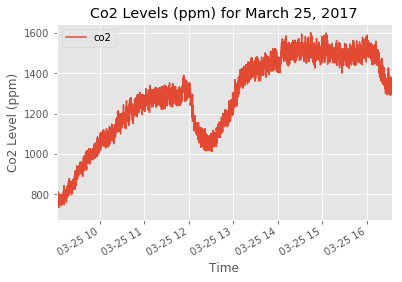

In [10]:
# Plot the Co2 data for March 25th with updated data
_ = co2_data.loc['March 25, 2017'].plot()
_ = plt.title('Co2 Levels (ppm) for March 25, 2017')
_ = plt.xlabel('Time')
_ = plt.ylabel('Co2 Level (ppm)')
plt.show()

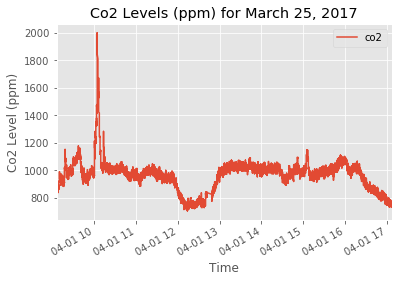

In [40]:
# Plot the Co2 data for March 25th with updated data
_ = co2_data.loc['April 1, 2017'].plot()
_ = plt.title('Co2 Levels (ppm) for March 25, 2017')
_ = plt.xlabel('Time')
_ = plt.ylabel('Co2 Level (ppm)')
plt.show()

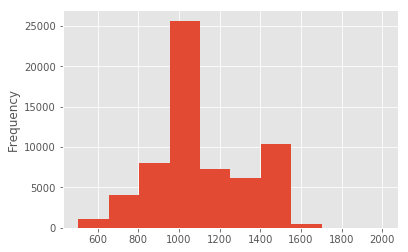

In [107]:
# Histogram of updated Co2 data
co2_data['co2'].plot(kind='hist')
plt.show()

In [23]:
# Drop unnecessary location column
co2_data = co2_data.drop('location', 1)

In [31]:
# Resample the data by taking the mean of each minute
# Delete NaN values generated by resampling the data
co2_resample = co2_data.resample('T').mean().dropna(how='all')

In [33]:
print(co2_resample.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 2017-03-25 09:02:00 to 2017-04-11 23:59:00
Data columns (total 1 columns):
co2    1644 non-null float64
dtypes: float64(1)
memory usage: 25.7 KB
None


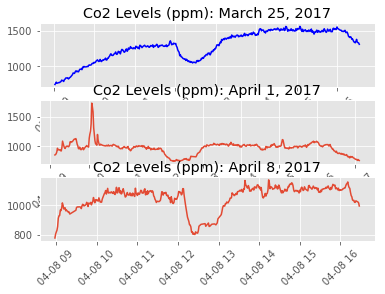

In [210]:
# Plot Co2 levels
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Co2 Levels (ppm): March 25, 2017')
plt.plot(co2_resample.loc['March 25, 2017'], color='blue')

plt.subplot(3,1,2)
plt.xticks(rotation=45)
plt.title('Co2 Levels (ppm): April 1, 2017')
plt.plot(co2_resample.loc['April 1, 2017'])

plt.subplot(3,1,3)
plt.xticks(rotation=45)
plt.title('Co2 Levels (ppm): April 8, 2017')
plt.plot(co2_resample.loc['April 8, 2017'])

plt.show()

In [36]:
# Import noise data
noise_file = 'older_noise-data.csv'
noise_data = pd.read_csv(noise_file, index_col='datetime', parse_dates=True)

In [41]:
print(noise_data.head())

                       location  noise
datetime                              
2017-03-25 09:04:45  Georgetown    483
2017-03-25 09:04:45  Georgetown    504
2017-03-25 09:04:46  Georgetown    521
2017-03-25 09:04:46  Georgetown    505
2017-03-25 09:04:47  Georgetown    504


In [42]:
print(noise_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118789 entries, 2017-03-25 09:04:45 to 2017-04-12 00:00:01
Data columns (total 2 columns):
location    118789 non-null object
noise       118789 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.7+ MB
None


In [43]:
noise_data.describe()

,noise
count,118789.000000
mean,504.403068
std,17.778362
min,0.000000
25%,499.000000
50%,505.000000
75%,511.000000
max,1023.000000


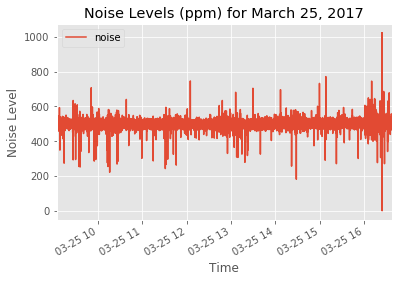

In [46]:
# Plot noise for March 25, 2017
_ = noise_data.loc['March 25, 2017'].plot()
_ = plt.title('Noise Levels (ppm) for March 25, 2017')
_ = plt.xlabel('Time')
_ = plt.ylabel('Noise Level')
plt.show()

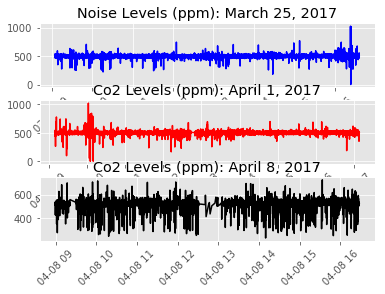

In [110]:
# Plot Noise levels
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Noise Levels (ppm): March 25, 2017')
plt.plot(noise_data.loc['March 25, 2017'], color='blue')

plt.subplot(3,1,2)
plt.xticks(rotation=45)
plt.title('Co2 Levels (ppm): April 1, 2017')
plt.plot(noise_data.loc['April 1, 2017'], color='red')

plt.subplot(3,1,3)
plt.xticks(rotation=45)
plt.title('Co2 Levels (ppm): April 8, 2017')
plt.plot(noise_data.loc['April 8, 2017'], color='black')

plt.show()

In [45]:
# Drop unnecessary location column
noise_data = noise_data.drop('location', 1)

In [55]:
# Resample the noise data by taking the mean of each minute
noise_resample = noise_data.resample('T').mean().dropna(how='all')

In [56]:
# New summary statistics for noise data
noise_resample.describe()

,noise
count,1649.000000
mean,504.769501
std,14.164893
min,413.000000
25%,501.733333
50%,504.300000
75%,506.900000
max,574.000000


In [113]:
# Import remaining sensor data includes temperature, humidity, light, bluetooth deveices, non-personal bluetooth devices
sensor_file = 'other-sensors-data.csv'
sensor_data = pd.read_csv(sensor_file, index_col='datetime', parse_dates=True)

In [119]:
print(sensor_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16755 entries, 2017-03-10 20:58:11 to 2017-04-08 16:28:01
Data columns (total 5 columns):
temperature                       16755 non-null float64
humidity                          16755 non-null float64
light                             16755 non-null int64
bluetooth_devices                 16755 non-null int64
bluetooth_non_personal_devices    4575 non-null float64
dtypes: float64(3), int64(2)
memory usage: 785.4 KB
None


In [152]:
print(sensor_data.head())

                     temperature  humidity  light  bluetooth_devices  \
datetime                                                               
2017-03-25 09:05:58         22.6      36.9    430                  1   
2017-03-25 09:06:04         23.8      39.0    448                  8   
2017-03-25 09:06:10         23.8      39.0    423                  8   
2017-03-25 09:06:15         23.8      39.0    412                  8   
2017-03-25 09:06:21         23.8      39.0    428                  9   

                     bluetooth_non_personal_devices  
datetime                                             
2017-03-25 09:05:58                             NaN  
2017-03-25 09:06:04                             NaN  
2017-03-25 09:06:10                             NaN  
2017-03-25 09:06:15                             NaN  
2017-03-25 09:06:21                             NaN  


In [181]:
# Drop unnecessary location column
#sensor_data = sensor_data.drop('location', 1)

# Delete data for March 10 through March 24
sensor_data = sensor_data.drop(sensor_data.loc['March 10, 2017':'March 24, 2017'].index)

# Delete data for April 9 through April 12
sensor_data = sensor_data.drop(sensor_data.loc['April 9, 2017':'April 12, 2017'].index)

In [183]:
# Resample the noise data by taking the mean of each minute
sensor_resample = sensor_data.resample('T').mean().dropna(how='all')

In [184]:
print(sensor_resample.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1302 entries, 2017-03-25 09:05:00 to 2017-04-08 16:28:00
Data columns (total 5 columns):
temperature                       1302 non-null float64
humidity                          1302 non-null float64
light                             1302 non-null float64
bluetooth_devices                 1302 non-null float64
bluetooth_non_personal_devices    420 non-null float64
dtypes: float64(5)
memory usage: 61.0 KB
None


In [185]:
# Concatenate Co2, Noise, and Sensor data in a new dataframe: sensor_all
sensor_all = pd.concat([co2_resample, noise_resample, sensor_resample], axis=1)

In [188]:
print(sensor_all.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1358 entries, 2017-03-25 09:02:00 to 2017-04-08 16:28:00
Data columns (total 7 columns):
co2                               1346 non-null float64
noise                             1349 non-null float64
temperature                       1302 non-null float64
humidity                          1302 non-null float64
light                             1302 non-null float64
bluetooth_devices                 1302 non-null float64
bluetooth_non_personal_devices    420 non-null float64
dtypes: float64(7)
memory usage: 84.9 KB
None


In [187]:
# Delete data for March 10 through March 24
sensor_all = sensor_all.drop(sensor_all.loc['March 10, 2017':'March 24, 2017'].index)

# Delete data for April 9 through April 12
sensor_all = sensor_all.drop(sensor_all.loc['April 9, 2017':'April 12, 2017'].index)

In [200]:
plt.style.available[:50]

['classic',
 'seaborn-dark-palette',
 'seaborn-talk',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-ticks',
 'grayscale',
 'seaborn-bright',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn-pastel',
 'ggplot',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-deep',
 'seaborn-white',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-notebook',
 'seaborn-paper',
 'bmh']

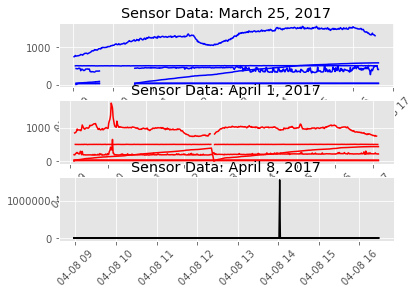

In [195]:
# Plot Sensor data for March 25, April 1, and April 8
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Sensor Data: March 25, 2017')
plt.plot(sensor_all.loc['March 25, 2017'], color='blue')

plt.subplot(3,1,2)
plt.xticks(rotation=45)
plt.title('Sensor Data: April 1, 2017')
plt.plot(sensor_all.loc['April 1, 2017'], color='red')

plt.subplot(3,1,3)
plt.xticks(rotation=45)
plt.title('Sensor Data: April 8, 2017')
plt.plot(sensor_all.loc['April 8, 2017'], color='black')

plt.show()